## Install and Run Sktime and init ShapeletTransform 
- 1.) ShapeletTransform 2012 : very long runtime
- 2.) RnadomShapeletTransform : improved runtime by magnitudes due to SAX abstraction


<br/> For RandomShapeletTransform the Output is the following: </br> 
- shapelets : list
The stored shapelets and relating information after a dataset has been processed. Each item in the list is a tuple containing the following 7 items: (shapelet information gain, shapelet length, start position the shapelet was extracted from, shapelet dimension, index of the instance the shapelet was extracted from in fit, class value of the shapelet, The z-normalised shapelet array)

In [ ]:
!pip install sktime
!pip install shap
import shap
import sktime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 37.9 MB/s eta 0:00:00


In [37]:
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sktime.datasets import load_arrow_head
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sktime.transformations.panel.shapelet_transform import ShapeletTransform
''' 
X, y = load_arrow_head()
X_train, X_test, y_train, y_test = train_test_split(X, y)
shapelet_trsf = ShapeletTransform()
shapelet_trsf.fit(X_train[:20], y_train[:20])
#y_pred = classifier.predict(X_test)
#accuracy_score(y_test, y_pred)
'''

#STOPPED AFTER 50 Mins

' \nX, y = load_arrow_head()\nX_train, X_test, y_train, y_test = train_test_split(X, y)\nshapelet_trsf = ShapeletTransform()\nshapelet_trsf.fit(X_train[:20], y_train[:20])\n#y_pred = classifier.predict(X_test)\n#accuracy_score(y_test, y_pred)\n'

In [142]:
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sktime.datasets import load_gunpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sktime.transformations.panel.shapelet_transform import RandomShapeletTransform
X, y = load_gunpoint()
X_train, X_test, y_train, y_test = train_test_split(X, y)
r_shapelet_trsf = RandomShapeletTransform(
    remove_self_similar= True,
    max_shapelets = 20,
    max_shapelet_length = 40
)
r_shapelet_trsf.fit_transform(X_train, y_train)
#y_pred = classifier.predict(X_test)
#accuracy_score(y_test, y_pred)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.029194,0.008830,0.015701,0.017846,0.006075,0.034375,0.009932,0.022584,0.009338,0.022959,0.300912,0.003798,1.632307,1.166394,0.131956,0.061023,0.431312,0.020982,0.079481,0.077096
1,0.100289,0.047018,0.061550,0.070381,0.042097,0.123368,0.056026,0.096517,0.043195,0.113370,0.269909,0.011254,1.007865,1.031034,0.017267,0.006945,0.462214,0.039037,0.008495,0.005524
2,0.010759,0.005011,0.007308,0.010555,0.008920,0.011648,0.005006,0.023583,0.003453,0.040717,0.300320,0.004743,1.691052,1.159163,0.163219,0.096681,0.425129,0.015901,0.103022,0.099452
3,0.163389,0.113886,0.127148,0.105263,0.052192,0.180449,0.068239,0.118736,0.047022,0.204305,0.418893,0.005048,1.404033,1.122354,0.019201,0.009915,0.380598,0.029230,0.012697,0.008463
4,0.094610,0.043554,0.057998,0.065885,0.037512,0.118726,0.051664,0.094294,0.039936,0.107558,0.453247,0.015977,0.994192,0.766149,0.009606,0.007631,0.088165,0.034165,0.008291,0.005664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.322083,0.314268,0.307597,0.295204,0.230722,0.314821,0.171998,0.115130,0.115076,0.352090,0.434833,0.013812,1.001861,0.977809,0.016600,0.006073,0.391965,0.027830,0.009580,0.007880
146,0.081358,0.036248,0.048406,0.052830,0.033118,0.105170,0.042414,0.071352,0.030745,0.102473,0.326673,0.005154,1.342028,1.141218,0.046640,0.012890,0.406837,0.025912,0.025628,0.022856
147,0.117097,0.063441,0.078083,0.073115,0.041262,0.138918,0.057964,0.106938,0.040620,0.151479,0.429745,0.013812,1.355782,0.968460,0.014470,0.005983,0.394921,0.029452,0.008511,0.006077
148,0.074961,0.032459,0.043889,0.047461,0.031445,0.099423,0.039660,0.060936,0.028225,0.096267,0.391910,0.003959,1.450555,1.138242,0.025492,0.018274,0.403574,0.024572,0.019843,0.015277


In [183]:

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from collections import Counter


def filterNanFromShapelet(shapelet):
    """
    Filter NaN values from a shapelet.
    Needed for the output of learning shapelets from tslearn, since smaller size shapelets are padded with NaN values.
    Note: Make sure the NaN values are only leading or trailing.
    """
    return shapelet[~np.isnan(shapelet)]


def lead_pad_shapelet(shapelet, pos):
    """
    Adding leading NaN values to shapelet to plot it on a time series at the best matching position.
    """
    pad = np.empty(pos)
    pad[:] = np.NaN
    padded_shapelet = np.concatenate([pad, filterNanFromShapelet(shapelet)])
    return padded_shapelet



#print(X_train.iloc[0].dim_0.T)
#print(X_train.index)
#print(y_train)

"""
mms = MinMaxScaler(feature_range=(0, 1))
ts = X_train.iloc[112].dim_0.values
ts = ts.reshape((len(ts), 1))
ts = mms.fit_transform(ts)
"""

#print(r_shapelet_trsf.shapelets)

ss = 1
ts = X_train.iloc[109].dim_0
znormalised = stats.zscore(ts)

#print(r_shapelet_trsf.shapelets[ss])

#plt.plot(znormalised)
#print(r_shapelet_trsf.shapelets[0])
c = []
xx_train = []
yy_train = []

counter = 0 
for i in range(len(r_shapelet_trsf.shapelets)): 
  c.append(r_shapelet_trsf.shapelets[i][5])
  xx_train.append(r_shapelet_trsf.shapelets[i][6])
  yy_train.append(r_shapelet_trsf.shapelets[i][5])
  if r_shapelet_trsf.shapelets[i][5] == "2": 
    #plt.plot(r_shapelet_trsf.shapelets[i][6])
    counter += 1

#shp = lead_pad_shapelet(r_shapelet_trsf.shapelets[ss][6],r_shapelet_trsf.shapelets[ss][2])
#plt.plot(shp)


print(Counter(c),c)

Counter({'1': 10, '2': 10}) ['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2']


## Visualizing Shapelets

(0.646414050404,
 39,
 57,
 0,
 70,
 '2',
 array([ 2.37714613,  1.83461941, -0.92289766,  0.2754051 , -0.74589154,
        -1.1217112 , -1.47304118,  0.13204259,  0.04974985, -0.93793644,
        -0.13703029,  0.88475814,  1.16001045, -1.76421606, -1.52545118,
         0.85543134, -0.75380531, -0.32054134,  0.77618199,  0.77618199,
         0.46643791, -0.63162537, -0.01504755,  1.11394382, -0.64025663,
        -0.3493122 , -0.7690389 ,  0.20383907,  1.35401538, -1.66936963,
        -0.4999684 ,  1.09740116, -0.17528294, -0.43762045,  1.19610351,
        -0.66422364, -0.71862456,  0.23077819,  1.48884642]))

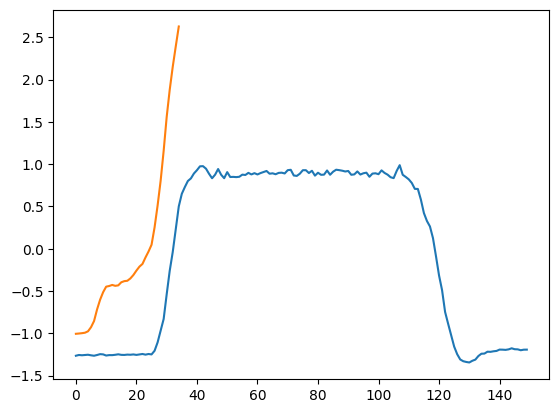

In [226]:
for i in range(len(r_shapelet_trsf.shapelets)): 
  pass
  #plt.plot(r_shapelet_trsf.shapelets[i][6])

plt.plot(X_train.iloc[58].dim_0)
plt.plot(r_shapelet_trsf.shapelets[6][6])
r_shapelet_trsf.shapelets[12]

## Evaluating Data and different Classifiers

In [206]:
dist_data = r_shapelet_trsf.transform(X_train)

### Logistic Regression

In [195]:
from sklearn.linear_model import LogisticRegression
xx_train=np.array(dist_data)
print(xx_train.shape)

LR = LogisticRegression(random_state=0).fit(dist_data, y_train)

LR.score(dist_data, y_train)

(150, 20)


0.9666666666666667

In [203]:
LR_explainer = shap.Explainer(LR, dist_data)
LR_explanation_obj = explainer(dist_data)

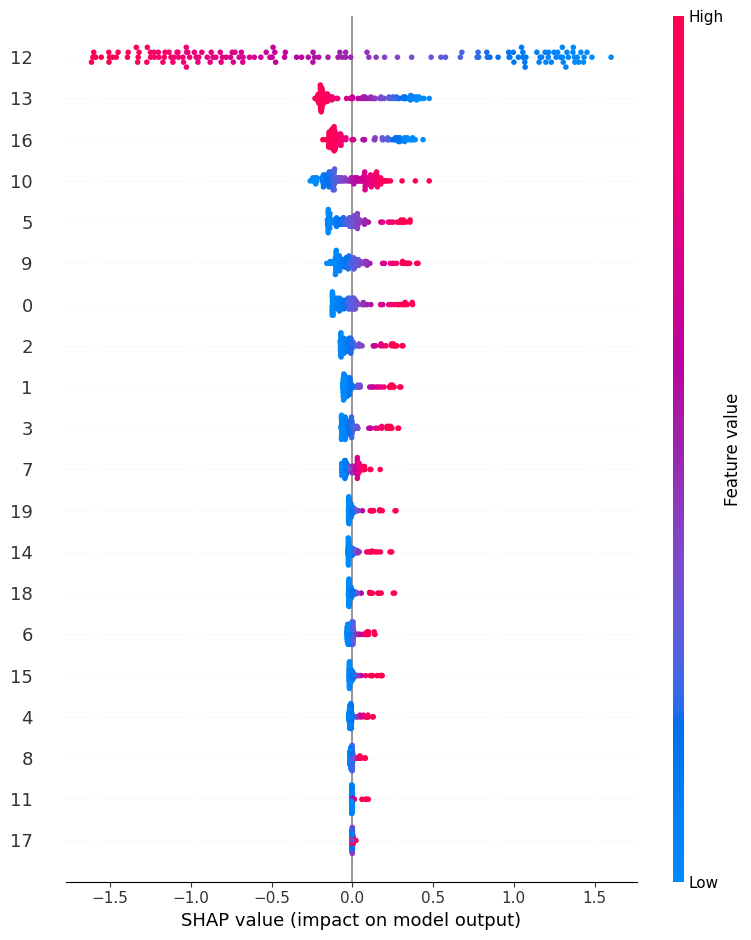

In [204]:
shap.summary_plot(LR_explanation_obj)

### Random Forest Classifier

In [207]:
from sklearn.ensemble import RandomForestClassifier


rclf = RandomForestClassifier(max_depth=5, random_state=0)

rclf.fit(dist_data, y_train)

rclf.score(dist_data,y_train)

1.0

In [227]:
x_test= r_shapelet_trsf.transform(X_test)

In [228]:
clf.score(x_test,y_test)

1.0

In [229]:
import shap 

explainer = shap.TreeExplainer(clf, dist_data)
explanation_obj = explainer(dist_data)

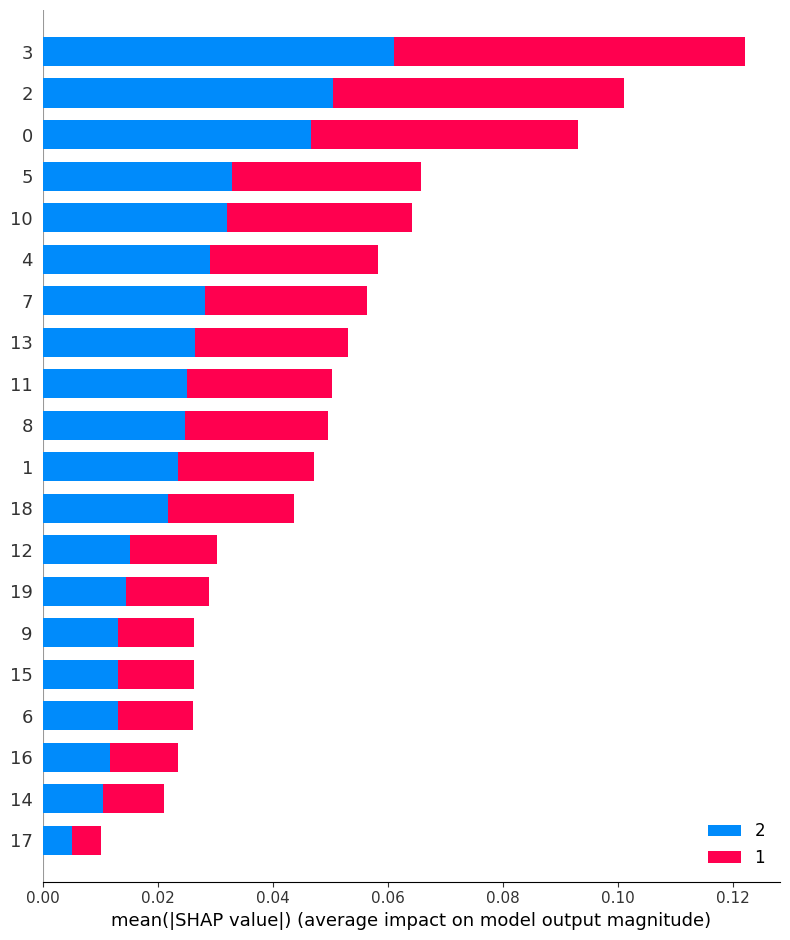

In [232]:
shap.summary_plot(list(explanation_obj.values.transpose(2,0,1)), dist_data, plot_type="bar", class_names= ["1","2","3","4","5"])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


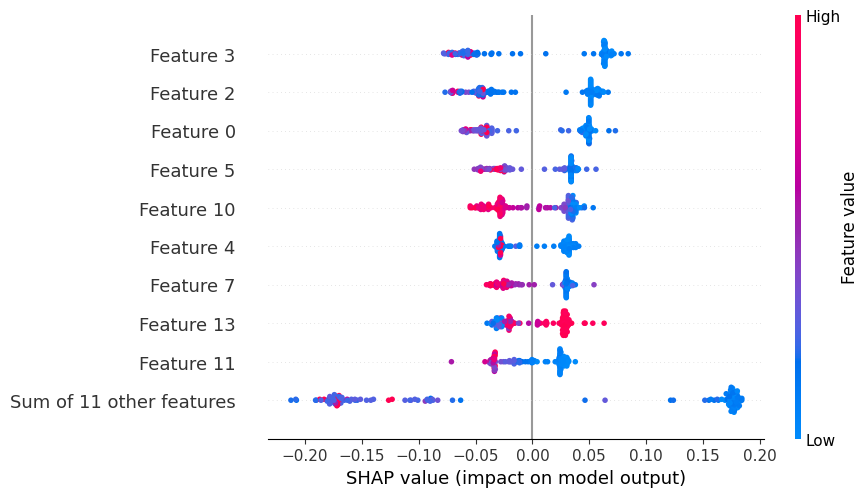

In [233]:
def explanation_for_class(explanation_obj,yclass): 
  shp_vals = explanation_obj.values[:,:,yclass]
  shp_bvals = explanation_obj.base_values[:,yclass]
  data = explanation_obj.data
  return shap.Explanation(shp_vals, base_values=shp_bvals, data=data)

class0 =  explanation_for_class(explanation_obj,0)
shap.plots.beeswarm(class0)

['1' '2' '1' '2' '2' '1' '2' '2' '1' '2' '1' '2' '2' '1' '1' '2' '2' '2'
 '2' '1' '1' '2' '2' '2' '2' '1' '2' '1' '2' '1' '2' '1' '2' '1' '1' '1'
 '1' '2' '1' '1' '1' '2' '1' '2' '1' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '1' '2' '1' '2' '2' '2' '2' '2' '1' '1' '2' '2' '1' '2' '1' '2' '2' '1'
 '1' '2' '1' '1' '2' '1' '1' '1' '2' '1' '1' '2' '2' '1' '1' '1' '2' '1'
 '2' '2' '1' '2' '1' '1' '1' '2' '2' '1' '1' '2' '1' '1' '2' '1' '1' '1'
 '1' '1' '1' '1' '2' '2' '2' '2' '1' '1' '1' '1' '1' '1' '1' '1' '1' '2'
 '1' '2' '2' '1' '1' '1' '1' '1' '1' '2' '2' '1' '2' '2' '2' '1' '2' '1'
 '2' '2' '1' '2' '1' '1']


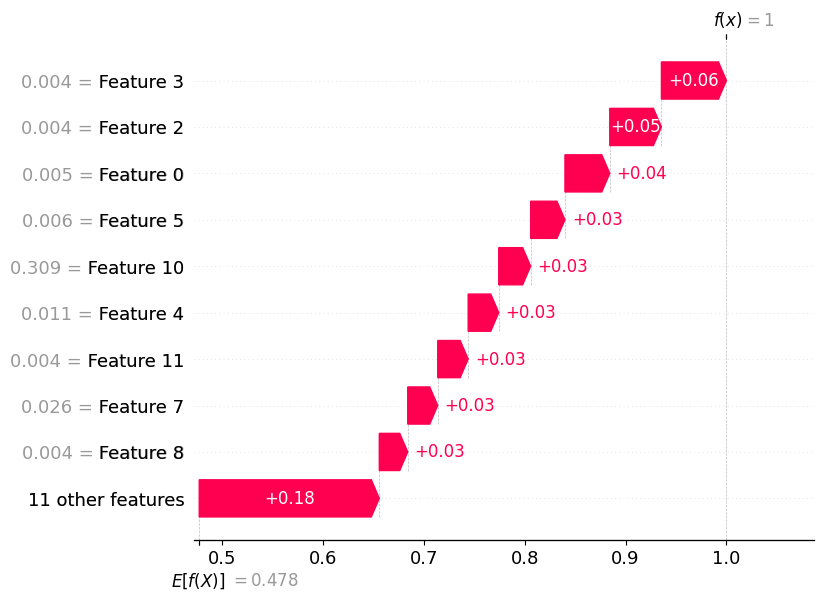

In [188]:
class0 =  explanation_for_class(explanation_obj,0)
#shap.plots.beeswarm(class0)

#shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_display.iloc[0,:])
print(y_train)
shap.plots.waterfall(class0[10], max_display=10)

